In [42]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.decomposition import PCA

In [2]:
pd.set_option('max_columns', 20)

In [3]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/notebooks/Casey'

In [4]:
path = '/Users/alvastrand/Downloads/'

os.chdir(path)

In [5]:
os.getcwd()

'/Users/alvastrand/Downloads'

In [6]:
filename = 'data_arr.csv'

df = pd.read_csv(filename)
print(df.shape)

df.head(2)

(56320, 19)


,sci_name,cell,mig_cell,breed_cell,cell_lat,cell_lng,year,arr_GAM_mean,arr_GAM_sd,arr_IAR_mean,arr_IAR_sd,per_ovr,gr_mn,gr_ncell,gr_type,mb_lat_4326,mb_lng_4326,cell_type,species
0,Archilochus_colubris,452,False,True,52.48,-94.42,2002,NaN,NaN,NaN,NaN,1.0,NaN,NaN,MidGreenup,40.113622,-83.080644,2,Ruby-throated Hummingbird
1,Archilochus_colubris,480,False,True,50.79,-91.68,2002,NaN,NaN,NaN,NaN,1.0,NaN,NaN,MidGreenup,40.113622,-83.080644,2,Ruby-throated Hummingbird


In [7]:
df['sci_name'] = df['sci_name'].str.replace('_', ' ')
print(df.shape)

df.head(2)

(56320, 19)


,sci_name,cell,mig_cell,breed_cell,cell_lat,cell_lng,year,arr_GAM_mean,arr_GAM_sd,arr_IAR_mean,arr_IAR_sd,per_ovr,gr_mn,gr_ncell,gr_type,mb_lat_4326,mb_lng_4326,cell_type,species
0,Archilochus colubris,452,False,True,52.48,-94.42,2002,NaN,NaN,NaN,NaN,1.0,NaN,NaN,MidGreenup,40.113622,-83.080644,2,Ruby-throated Hummingbird
1,Archilochus colubris,480,False,True,50.79,-91.68,2002,NaN,NaN,NaN,NaN,1.0,NaN,NaN,MidGreenup,40.113622,-83.080644,2,Ruby-throated Hummingbird


In [8]:
df_sci_names_cells = df[['sci_name', 'cell']].drop_duplicates()

df_sci_names_cells = df_sci_names_cells.sort_values(by=['sci_name', 'cell'])

df_sci_names_cells = df_sci_names_cells.reset_index(drop=True)

print(df_sci_names_cells.shape)

df_sci_names_cells.head(2)

(3520, 2)


,sci_name,cell
0,Archilochus colubris,452
1,Archilochus colubris,480


In [9]:
df = df.dropna(subset=['arr_GAM_mean'])

df = df.rename(columns={'cell_lat': 'lat', 'cell_lng': 'lon'})

df = df.sort_values(by=['sci_name', 'cell', 'year'])

df = df.reset_index(drop=True)

print(df.shape)

df.head(2)

(20576, 19)


,sci_name,cell,mig_cell,breed_cell,lat,lon,year,arr_GAM_mean,arr_GAM_sd,arr_IAR_mean,arr_IAR_sd,per_ovr,gr_mn,gr_ncell,gr_type,mb_lat_4326,mb_lng_4326,cell_type,species
0,Archilochus colubris,513,False,True,49.07,-68.37,2014,145.870667,2.800694,145.519872,1.840508,0.8,148.34,360671.0,MidGreenup,40.113622,-83.080644,2,Ruby-throated Hummingbird
1,Archilochus colubris,513,False,True,49.07,-68.37,2015,143.959667,2.789020,141.535480,1.832606,0.8,146.65,357013.0,MidGreenup,40.113622,-83.080644,2,Ruby-throated Hummingbird


In [10]:
list_sci_names = list(df['sci_name'].unique())
print(len(list_sci_names))

56


In [11]:
list_common_names = list(df['species'].unique())
print(len(list_common_names))

56


In [12]:
df_sci_names_cells = df[['sci_name', 'cell']].drop_duplicates()

df_sci_names_cells = df_sci_names_cells.reset_index(drop=True)

print(df_sci_names_cells.shape)

df_sci_names_cells.head(2)

(2550, 2)


,sci_name,cell
0,Archilochus colubris,513
1,Archilochus colubris,514


In [13]:
filename = 'data_sensi.csv'

df_s = pd.read_csv(filename)
print(df_s.shape)

#

df_s.head(2)

(3520, 11)


,sci_name,species,cell,cell_lat,cell_lng,beta_mean,beta_sd,xi_mean,xi_sd,gamma_mean,gamma_sd
0,Archilochus_colubris,Ruby-throated Hummingbird,452,52.48,-94.42,0.137649,0.086264,0.004206,0.022077,0.011857,0.004675
1,Archilochus_colubris,Ruby-throated Hummingbird,480,50.79,-91.68,0.116928,0.067593,0.004206,0.022077,0.011857,0.004675


In [14]:
df_s['sci_name'] = df_s['sci_name'].str.replace('_', ' ')

df_s = df_s.rename(columns={'cell_lat': 'lat', 'cell_lng': 'lon'})

df_s = df_s.sort_values(by=['sci_name', 'cell'])

df_s = df_s.reset_index(drop=True)

print(df_s.shape)

df_s.head(2)

(3520, 11)


,sci_name,species,cell,lat,lon,beta_mean,beta_sd,xi_mean,xi_sd,gamma_mean,gamma_sd
0,Archilochus colubris,Ruby-throated Hummingbird,452,52.48,-94.42,0.137649,0.086264,0.004206,0.022077,0.011857,0.004675
1,Archilochus colubris,Ruby-throated Hummingbird,480,50.79,-91.68,0.116928,0.067593,0.004206,0.022077,0.011857,0.004675


In [15]:
# Body mass data

filename = 'WTH_COMBO2.csv'

df_masses = pd.read_csv(filename)
print(df_masses.shape)

df_masses.head(2)

(14352, 13)


,Family,Species Name,Common Name,Sex,N,Mean,S.D.,Min,Max,Season,Location,Source #,Comments
0,Rheidae,Rhea pennata,Lesser Rhea,M,3,23900.0,NaN,19100,28600,NaN,NaN,256,NaN
1,Casuariidae,Casuarius bennetti,Dwarf Cassowary,U,NaN,35000.0,NaN,NaN,NaN,NaN,NaN,291,NaN


In [16]:
df_masses = df_masses[df_masses['Common Name'].isin(list_common_names)]

df_masses = df_masses.dropna(subset=['N'])

df_masses['N'] = pd.to_numeric(df_masses['N'])

df_masses = df_masses.sort_values(by='Species Name ')

df_masses = df_masses.reset_index(drop=True)

print(df_masses.shape)

df_masses.head(2)

(108, 13)


,Family,Species Name,Common Name,Sex,N,Mean,S.D.,Min,Max,Season,Location,Source #,Comments
0,Trochilidae,Archilochus colubris,Ruby-throated Hummingbird,M,121,2.9,0.2,2.4,3.7,NaN,"Pennsylvania, USA",828,NaN
1,Trochilidae,Archilochus colubris,Ruby-throated Hummingbird,F,463,3.3,0.3,2.6,4.1,NaN,NaN,NaN,NaN


In [17]:
len(df_masses['Common Name'].unique())

54

In [18]:
set(list_common_names) - set(df_masses['Common Name'].unique())

{'Blue-winged Warbler', 'Gray Catbird'}

In [19]:
df_masses['product_n_mean'] = df_masses['N'] * df_masses['   Mean ']
print(df_masses.shape)

df_masses.head(2)

(108, 14)


,Family,Species Name,Common Name,Sex,N,Mean,S.D.,Min,Max,Season,Location,Source #,Comments,product_n_mean
0,Trochilidae,Archilochus colubris,Ruby-throated Hummingbird,M,121,2.9,0.2,2.4,3.7,NaN,"Pennsylvania, USA",828,NaN,350.9
1,Trochilidae,Archilochus colubris,Ruby-throated Hummingbird,F,463,3.3,0.3,2.6,4.1,NaN,NaN,NaN,NaN,1527.9


In [20]:
list_weighted_masses = []

for species in list_common_names:

    df_masses_species = df_masses[df_masses['Common Name'] == species]

    df_masses_species = df_masses_species.reset_index(drop=True)

    # print(df_masses_species.shape)

    # df_masses_species.head(2)

    list_weighted_masses.append(df_masses_species['product_n_mean'].sum() / df_masses_species['N'].sum())

/Users/alvastrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [21]:
df_weighted = pd.DataFrame(data={'species': list_common_names, 'body_mass': list_weighted_masses})

df_weighted = df_weighted.dropna(subset=['body_mass'])

print(df_weighted.shape)

df_weighted.head(2)

(54, 2)


,species,body_mass
0,Ruby-throated Hummingbird,3.217123
1,Veery,31.900000


In [23]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/BirdLife/'

os.chdir(path)

In [24]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/BirdLife'

In [25]:
filename = 'migration_distance_birdlife_west-hem.txt'

df_distances = pd.read_csv(filename, sep='\t')
print(df_distances.shape)

df_distances.head(2)

(4785, 8)


,scientific,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect
0,Abeillia abeillei,-90.500000,15.543646,-90.500000,15.543646,19.849085,0.0,1.0
1,Aburria aburri,-75.227941,-1.987264,-75.227941,-1.987264,11.022187,0.0,1.0


In [26]:
df_distances = df_distances.rename(columns={'scientific': 'sci_name'})

df_distances = df_distances[df_distances['sci_name'].isin(list_sci_names)]

df_distances = df_distances.sort_values(by='sci_name')

df_distances = df_distances.reset_index(drop=True)

print(df_distances.shape)

df_distances.head(2)

(56, 8)


,sci_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect
0,Archilochus colubris,-87.075715,41.493853,-91.025904,16.609263,26.935812,2784.239053,0.001712
1,Catharus fuscescens,-93.562222,46.620977,-52.924181,-14.012278,-6.057114,7846.937037,0.000000


In [27]:
df_s_merged = df_s.merge(df_weighted, on='species')
print(df_s_merged.shape)

df_s_merged.head(2)

(3419, 12)


,sci_name,species,cell,lat,lon,beta_mean,beta_sd,xi_mean,xi_sd,gamma_mean,gamma_sd,body_mass
0,Archilochus colubris,Ruby-throated Hummingbird,452,52.48,-94.42,0.137649,0.086264,0.004206,0.022077,0.011857,0.004675,3.217123
1,Archilochus colubris,Ruby-throated Hummingbird,480,50.79,-91.68,0.116928,0.067593,0.004206,0.022077,0.011857,0.004675,3.217123


In [28]:
df_s_merged = df_s_merged.merge(df_distances, on='sci_name')
print(df_s_merged.shape)

df_s_merged.head(2)

(3419, 19)


,sci_name,species,cell,lat,lon,beta_mean,beta_sd,xi_mean,xi_sd,gamma_mean,gamma_sd,body_mass,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect
0,Archilochus colubris,Ruby-throated Hummingbird,452,52.48,-94.42,0.137649,0.086264,0.004206,0.022077,0.011857,0.004675,3.217123,-87.075715,41.493853,-91.025904,16.609263,26.935812,2784.239053,0.001712
1,Archilochus colubris,Ruby-throated Hummingbird,480,50.79,-91.68,0.116928,0.067593,0.004206,0.022077,0.011857,0.004675,3.217123,-87.075715,41.493853,-91.025904,16.609263,26.935812,2784.239053,0.001712


In [45]:
model_ols = smf.ols(formula='beta_mean ~ body_mass * distance', data=df_s_merged)

res_ols = model_ols.fit()

print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              beta_mean   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     100.9
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           1.37e-62
Time:                        00:53:59   Log-Likelihood:                 2338.1
No. Observations:                3419   AIC:                            -4668.
Df Residuals:                    3415   BIC:                            -4644.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1570      0

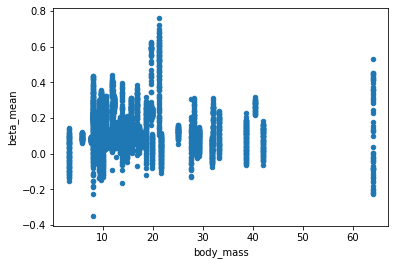

In [46]:
ax = df_s_merged.plot.scatter(x='body_mass', y='beta_mean')

plt.show()

In [36]:
df_s_merged_means = df_s_merged[['sci_name', 'species', 'xi_mean', 'xi_sd', 'gamma_mean', 'gamma_sd', 'body_mass', 
                                 'LON.b', 'LAT.b', 'LON.nb', 'LAT.nb', 'MAX.LAT.nb', 'distance', 'intersect']].drop_duplicates()

df_s_merged_means = df_s_merged_means.reset_index(drop=True)

print(df_s_merged_means.shape)

df_s_merged_means.head(2)

(54, 14)


,sci_name,species,xi_mean,xi_sd,gamma_mean,gamma_sd,body_mass,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect
0,Archilochus colubris,Ruby-throated Hummingbird,0.004206,0.022077,0.011857,0.004675,3.217123,-87.075715,41.493853,-91.025904,16.609263,26.935812,2784.239053,0.001712
1,Catharus fuscescens,Veery,0.023148,0.024254,0.006405,0.004829,31.900000,-93.562222,46.620977,-52.924181,-14.012278,-6.057114,7846.937037,0.000000


In [37]:
model_ols = smf.ols(formula='xi_mean ~ body_mass * distance', data=df_s_merged_means)

res_ols = model_ols.fit()

print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                xi_mean   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.615
Date:                Sun, 19 Jun 2022   Prob (F-statistic):             0.0613
Time:                        00:47:23   Log-Likelihood:                 51.472
No. Observations:                  54   AIC:                            -94.94
Df Residuals:                      50   BIC:                            -86.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1760      0

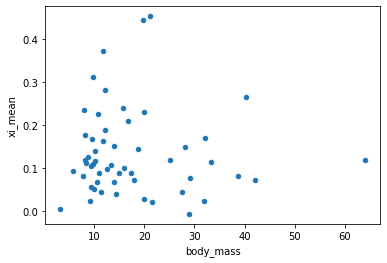

In [47]:
ax = df_s_merged_means.plot.scatter(x='body_mass', y='xi_mean')

plt.show()

In [ ]:
species = 

df_species = df[df['sci_name'] == species]

df_species = df_species[['species', 'sci_name', 'cell', 'year', 'lat', 'lon', 'arr_IAR_mean']]

df_species = df_species.reset_index(drop=True)

print(df_species.shape)

df_species.head(2)

In [ ]:
df_cnt = df_species[['cell', 'year']].groupby(['cell']).count()

df_cnt = df_cnt.reset_index()

df_cnt = df_cnt.rename(columns={'year': 'number_of_years'})

print(df_cnt.shape)

df_cnt.head(2)

In [ ]:
list_cells = list(df_cnt[df_cnt['number_of_years'] >= number_of_years]['cell'])
print(len(list_cells))

print(len(list(df_cnt[df_cnt['number_of_years'] >= 3]['cell'])))

df_species = df_species[df_species['cell'].isin(list_cells)]
print(df_species.shape)

In [ ]:
list_slopes = []
list_r_squared = []
list_p_values = []

for cell in list_cells:

    df_cell = df_species[df_species['cell'] == cell]
    
    df_cell = df_cell.reset_index(drop=True)
    
    print(df_cell.shape)

    model_ols = smf.ols(formula='arr_IAR_mean ~ year', data=df_cell)

    res_ols = model_ols.fit()

    # print(res_ols.summary())

    list_slopes.append(res_ols.params[1])

    list_intercepts.append(res_ols.params[0])

    list_r_squared.append(res_ols.rsquared)

    list_p_values.append(res_ols.pvalues[1])

df_slopes = pd.DataFrame(data={'cell': list_cells, 'slope': list_slopes, 'r_squared': list_r_squared, 
                                'p_value': list_p_values})

df_slopes['scientific_name'] = species

print(df_slopes.shape)

df_slopes.head(2)

# Quality control?

# Latitude

model_ols = smf.ols(formula='slope ~ lat', data=df_slopes)

res_ols = model_ols.fit()

slope_lat = res_ols.params[1]